In [6]:
import os
import cv2
import json
import shutil
import random
import pickle
import imageio
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt

In [17]:
def plot_image_label(sample_df, root_dir1, root_dir2):
    img_path = os.path.join(root_dir1, sample_df['artifact_debayeredrgb_0_save_path'])
    if not os.path.isfile(img_path):
        img_path = os.path.join(root_dir2, sample_df['artifact_debayeredrgb_0_save_path'])
    image = imageio.imread(img_path)
    plt.figure(figsize=(12, 6))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [13]:
data_dir1 = '/data/jupiter/li.yu/data/all_hitchhiker_left_images_location_filtered_20220729'
df1 = pd.read_csv(os.path.join(data_dir1, 'annotations.csv'), low_memory=False)
data_dir2 = '/data/jupiter/li.yu/data/only_new_hitchhiker_left_images_location_filtered_20221018'
df2 = pd.read_csv(os.path.join(data_dir2, 'annotations.csv'), low_memory=False)
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(2351325, 81)

In [14]:
# merge with dust prediction csv
# pred_csv1 = '/data/jupiter/li.yu/exps/driveable_terrain_model/v471_rd_2cls_dustseghead_0808/all_hitchhiker_left_images_location_filtered_20220729/preds.csv'  # for day analysis
pred_csv1 = '/data/jupiter/li.yu/exps/driveable_terrain_model/v471_rf_2cls_dustseghead_0927/all_hitchhiker_left_images_location_filtered_20220729/preds.csv'  # for night analysis
pred_df1 = pd.read_csv(pred_csv1, low_memory=False)
# pred_csv2 = '/data/jupiter/li.yu/exps/driveable_terrain_model/v471_rd_2cls_dustseghead_0808/only_new_hitchhiker_left_images_location_filtered_20221018/preds.csv'
pred_csv2 = '/data/jupiter/li.yu/exps/driveable_terrain_model/v471_rf_2cls_dustseghead_0927/only_new_hitchhiker_left_images_location_filtered_20221018/preds.csv'
pred_df2 = pd.read_csv(pred_csv2, low_memory=False)
pred_df = pd.concat([pred_df1, pred_df2], ignore_index=True)
print(pred_df.shape)

df = df.merge(pred_df, on='id')
df.shape

(2351325, 6)


(2351325, 86)

## Show dusty night images

In [15]:
threshold = 0.1

(14141, 86)


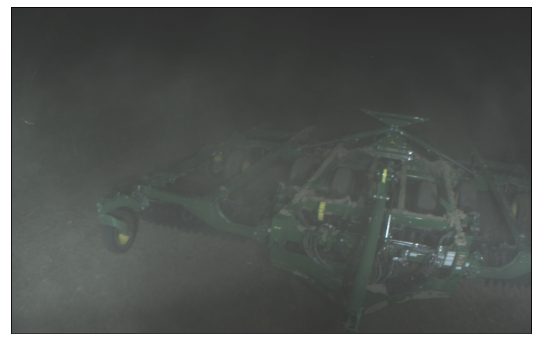

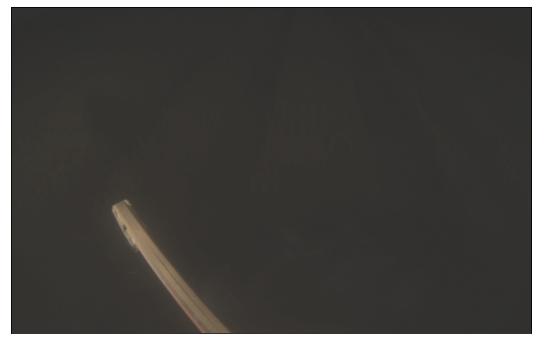

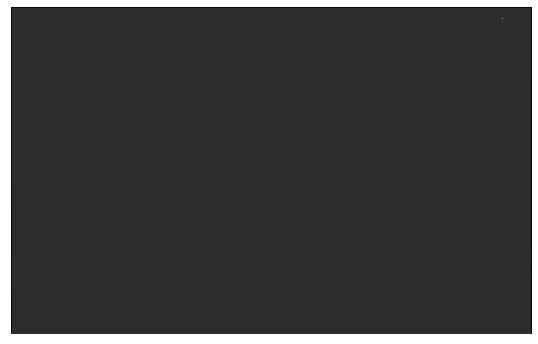

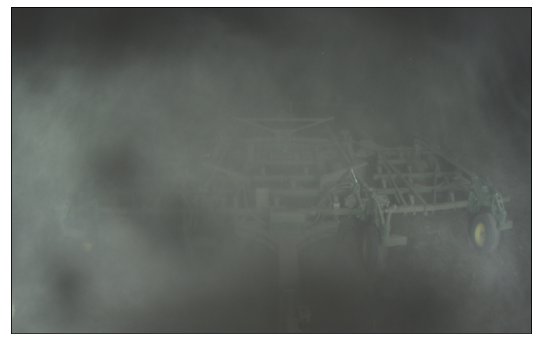

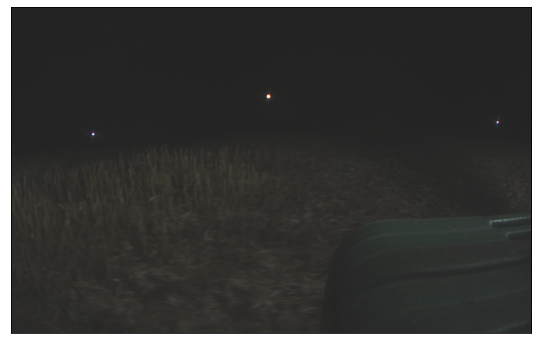

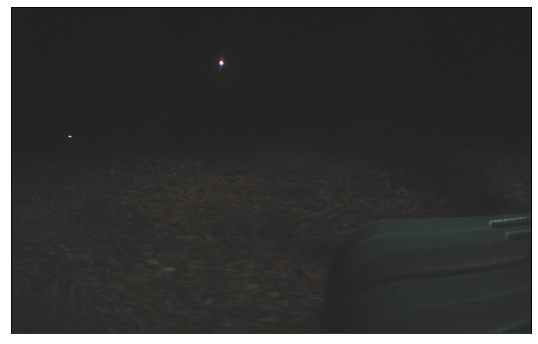

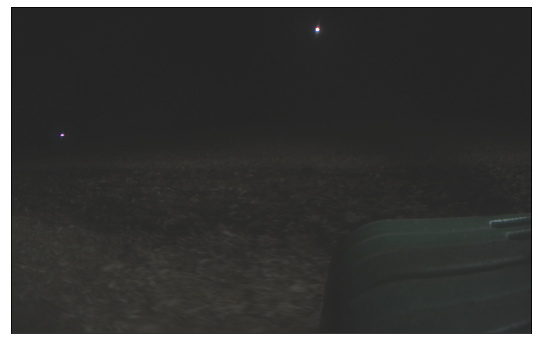

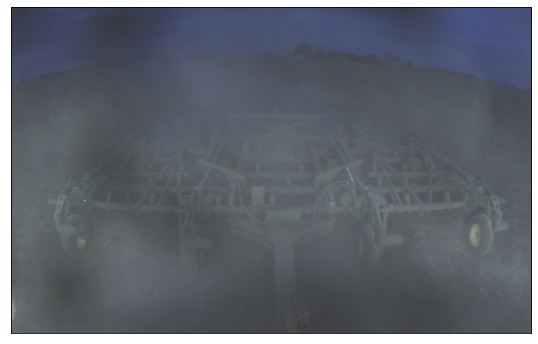

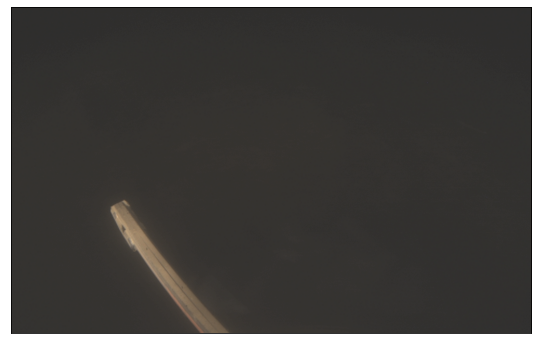

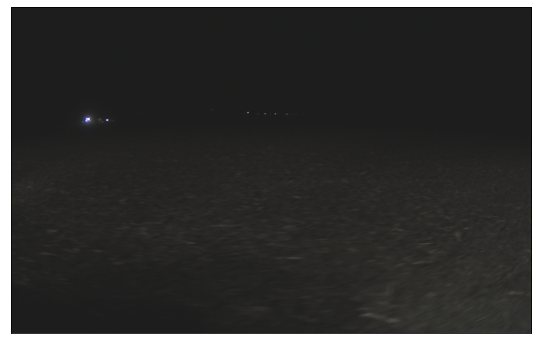

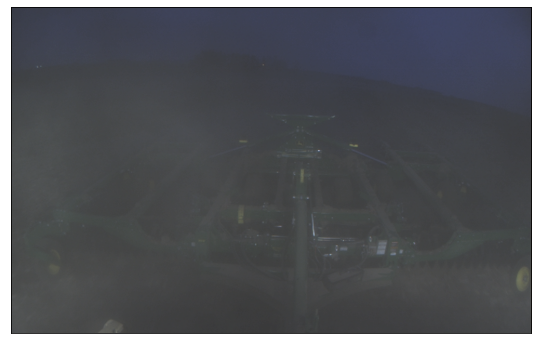

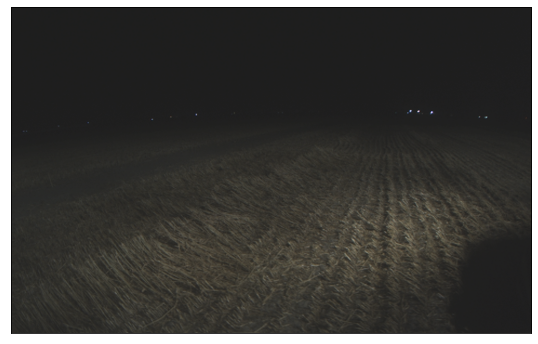

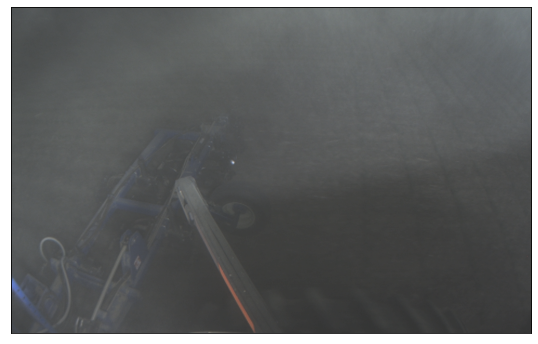

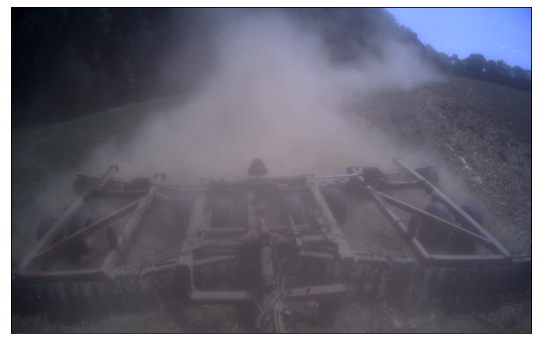

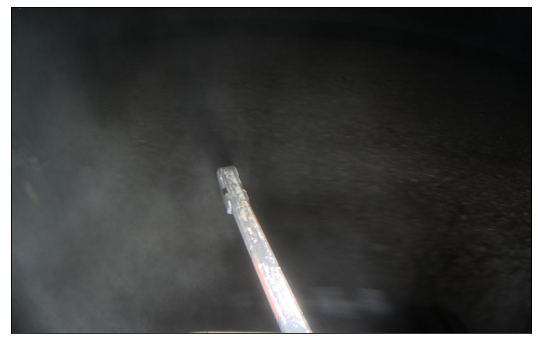

In [20]:
sub_df = df[(df.operation_time != 'daytime') & (df.dust_ratio >= threshold)]
print(sub_df.shape)
for i, sample_df in sub_df.sample(15).iterrows():
    plot_image_label(sample_df, data_dir1, data_dir2)